In [2]:
# import necessary libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, fbeta_score


# Importing Data 

In [3]:
# read data stored in path, using pd.read_csv

data = pd.read_csv("C:\\Users\\Test\\Downloads\\atpmatches2015-2016-2017.csv")
print(data)

                     tourney_name surface  draw_size tourney_level  \
0                           Tokyo    Hard       32.0             A   
1                           Tokyo    Hard       32.0             A   
2                           Tokyo    Hard       32.0             A   
3                           Tokyo    Hard       32.0             A   
4                           Tokyo    Hard       32.0             A   
...                           ...     ...        ...           ...   
6345  Davis Cup WG R1: RUS vs SRB    Hard        4.0             D   
6346  Davis Cup WG R1: SUI vs USA    Hard        4.0             D   
6347  Davis Cup WG R1: SUI vs USA    Hard        4.0             D   
6348  Davis Cup WG R1: SUI vs USA    Hard        4.0             D   
6349  Davis Cup WG R1: SUI vs USA    Hard        4.0             D   

      tourney_date  match_num  winner_id         winner_name winner_hand  \
0       20151005.0        1.0   104527.0  Stanislas Wawrinka           R   
1      

# Reading Data 

In [4]:
# display a sample of the data
data.head()

,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank_points,score,round
0,Tokyo,Hard,32.0,A,20151005.0,1.0,104527.0,Stanislas Wawrinka,R,183.0,...,6005.0,103285.0,Radek Stepanek,R,185.0,CZE,36.854209,187.0,7-5 6-3,R32
1,Tokyo,Hard,32.0,A,20151005.0,2.0,105147.0,Tatsuma Ito,R,180.0,...,444.0,106415.0,Yoshihito Nishioka,L,NaN,JPN,20.021903,377.0,3-6 6-0 7-5,R32
2,Tokyo,Hard,32.0,A,20151005.0,3.0,105572.0,Austin Krajicek,L,NaN,...,450.0,105051.0,Matthew Ebden,R,188.0,AUS,27.857632,430.0,5-7 7-6(4) 7-6(5),R32
3,Tokyo,Hard,32.0,A,20151005.0,4.0,105311.0,Joao Sousa,R,NaN,...,951.0,103852.0,Feliciano Lopez,L,188.0,ESP,34.039699,2040.0,6-4 4-6 6-1,R32
4,Tokyo,Hard,32.0,A,20151005.0,5.0,104468.0,Gilles Simon,R,183.0,...,2530.0,104022.0,Mikhail Youzhny,R,183.0,RUS,33.278576,581.0,6-4 6-4,R32


In [5]:
# list all columns
data.columns

Index(['tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'winner_id', 'winner_name', 'winner_hand', 'winner_ht',
       'winner_ioc', 'winner_age', 'winner_rank', 'winner_rank_points',
       'loser_id', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank_points', 'score', 'round'],
      dtype='object')

In [6]:
#identify null values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_name        6287 non-null   object 
 1   surface             6287 non-null   object 
 2   draw_size           6287 non-null   float64
 3   tourney_level       6287 non-null   object 
 4   tourney_date        6287 non-null   float64
 5   match_num           6287 non-null   float64
 6   winner_id           6287 non-null   float64
 7   winner_name         6287 non-null   object 
 8   winner_hand         6278 non-null   object 
 9   winner_ht           4840 non-null   float64
 10  winner_ioc          6287 non-null   object 
 11  winner_age          6281 non-null   float64
 12  winner_rank         6231 non-null   float64
 13  winner_rank_points  6231 non-null   float64
 14  loser_id            6287 non-null   float64
 15  loser_name          6287 non-null   object 
 16  loser_

In [7]:
# identify dataset size (rows, columns)
data.shape

(6350, 23)

In [8]:
# display a simple statistics 
data.describe()

,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,loser_ht,loser_age,loser_rank_points
count,6287.000000,6.287000e+03,6287.000000,6287.000000,4840.000000,6281.000000,6231.000000,6231.000000,6287.000000,4350.000000,6275.000000,6169.000000
mean,55.536822,2.015645e+07,130.822809,105689.230794,186.980785,27.921184,79.011234,2017.438774,106546.211866,186.593103,27.557045,1070.441563
std,41.932804,5.986561e+03,121.835184,5721.441249,7.892505,4.065164,151.086826,2748.169971,8367.990262,7.395875,4.325912,1306.684453
min,4.000000,2.015010e+07,1.000000,100644.000000,163.000000,16.892539,1.000000,1.000000,100644.000000,163.000000,16.361396,1.000000
25%,28.000000,2.015062e+07,14.000000,104542.000000,183.000000,25.267625,16.000000,670.000000,104547.000000,183.000000,24.691307,501.000000
50%,32.000000,2.016012e+07,86.000000,104926.000000,188.000000,28.175222,41.000000,1033.000000,105064.000000,188.000000,27.734428,755.000000
75%,64.000000,2.016063e+07,276.000000,105643.000000,190.000000,30.595483,79.000000,1985.000000,105723.000000,190.000000,30.600958,1170.000000
max,128.000000,2.017020e+07,319.000000,202382.000000,208.000000,38.138261,2101.000000,16950.000000,202359.000000,208.000000,46.036961,16950.000000


In [9]:
data.isnull().all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
6345    False
6346    False
6347    False
6348    False
6349    False
Length: 6350, dtype: bool

In [10]:
# Number of rows where all values are null
data.isnull().all(axis=1).sum()

63

In [11]:
# Number of rows after drop null rows
len(data)-data.isnull().all(axis=1).sum()

6287

In [12]:
# call rows where all values are null
data[data.isnull().all(axis=1)]


,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank_points,score,round
4926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Data

In [13]:
# make a copy of the data to start the cleaning
tennis_data = data.copy()

In [14]:
# display sample of the copied data
tennis_data.head()

,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank_points,score,round
0,Tokyo,Hard,32.0,A,20151005.0,1.0,104527.0,Stanislas Wawrinka,R,183.0,...,6005.0,103285.0,Radek Stepanek,R,185.0,CZE,36.854209,187.0,7-5 6-3,R32
1,Tokyo,Hard,32.0,A,20151005.0,2.0,105147.0,Tatsuma Ito,R,180.0,...,444.0,106415.0,Yoshihito Nishioka,L,NaN,JPN,20.021903,377.0,3-6 6-0 7-5,R32
2,Tokyo,Hard,32.0,A,20151005.0,3.0,105572.0,Austin Krajicek,L,NaN,...,450.0,105051.0,Matthew Ebden,R,188.0,AUS,27.857632,430.0,5-7 7-6(4) 7-6(5),R32
3,Tokyo,Hard,32.0,A,20151005.0,4.0,105311.0,Joao Sousa,R,NaN,...,951.0,103852.0,Feliciano Lopez,L,188.0,ESP,34.039699,2040.0,6-4 4-6 6-1,R32
4,Tokyo,Hard,32.0,A,20151005.0,5.0,104468.0,Gilles Simon,R,183.0,...,2530.0,104022.0,Mikhail Youzhny,R,183.0,RUS,33.278576,581.0,6-4 6-4,R32


In [15]:
# list the number of nulls in each column before the deletion
tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_name        6287 non-null   object 
 1   surface             6287 non-null   object 
 2   draw_size           6287 non-null   float64
 3   tourney_level       6287 non-null   object 
 4   tourney_date        6287 non-null   float64
 5   match_num           6287 non-null   float64
 6   winner_id           6287 non-null   float64
 7   winner_name         6287 non-null   object 
 8   winner_hand         6278 non-null   object 
 9   winner_ht           4840 non-null   float64
 10  winner_ioc          6287 non-null   object 
 11  winner_age          6281 non-null   float64
 12  winner_rank         6231 non-null   float64
 13  winner_rank_points  6231 non-null   float64
 14  loser_id            6287 non-null   float64
 15  loser_name          6287 non-null   object 
 16  loser_

In [16]:
# drop all "how='all'" null rows "axis=0" using store it in the same dataframe "inplace=True"
tennis_data.dropna(axis= 0, how='all', inplace=True)

In [17]:
# check if the null values are dropped or not and number of rows are as expected
tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6287 entries, 0 to 6349
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_name        6287 non-null   object 
 1   surface             6287 non-null   object 
 2   draw_size           6287 non-null   float64
 3   tourney_level       6287 non-null   object 
 4   tourney_date        6287 non-null   float64
 5   match_num           6287 non-null   float64
 6   winner_id           6287 non-null   float64
 7   winner_name         6287 non-null   object 
 8   winner_hand         6278 non-null   object 
 9   winner_ht           4840 non-null   float64
 10  winner_ioc          6287 non-null   object 
 11  winner_age          6281 non-null   float64
 12  winner_rank         6231 non-null   float64
 13  winner_rank_points  6231 non-null   float64
 14  loser_id            6287 non-null   float64
 15  loser_name          6287 non-null   object 
 16  loser_

In [18]:
# Number of rows where all values are null after teh deletion
tennis_data.isnull().all(axis=1).sum()

0

In [19]:
# Identify number of null values in each column
tennis_data.count()-len(tennis_data)

tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_name              0
winner_hand             -9
winner_ht            -1447
winner_ioc               0
winner_age              -6
winner_rank            -56
winner_rank_points     -56
loser_id                 0
loser_name               0
loser_hand             -20
loser_ht             -1937
loser_ioc                0
loser_age              -12
loser_rank_points     -118
score                    0
round                    0
dtype: int64

### Start processing missing data

In [20]:
# calculate number of players using each hand
print(tennis_data['winner_hand'].value_counts())
print(' ')
print(tennis_data['loser_hand'].value_counts())

R    5298
L     835
U     145
Name: winner_hand, dtype: int64
 
R    5070
L     911
U     286
Name: loser_hand, dtype: int64


In [21]:
# percentage of using each hand for winner
print(tennis_data['winner_hand'].value_counts()/len(tennis_data)*100)
print(' ')
# percentage of using each hand for winner
print(tennis_data['loser_hand'].value_counts()/len(tennis_data)*100)

R    84.269127
L    13.281374
U     2.306346
Name: winner_hand, dtype: float64
 
R    80.642596
L    14.490218
U     4.549070
Name: loser_hand, dtype: float64


In [22]:
# based on the above values I will assume that the missing values is 'R'
tennis_data['winner_hand'].fillna('R', inplace=True)
print(tennis_data['winner_hand'].value_counts())
print(' ')
tennis_data['loser_hand'].fillna('R', inplace=True)
print(tennis_data['loser_hand'].value_counts())

R    5307
L     835
U     145
Name: winner_hand, dtype: int64
 
R    5090
L     911
U     286
Name: loser_hand, dtype: int64


In [23]:
# list the winner height values and count of each value
tennis_data['winner_ht'].value_counts()

188.0    878
185.0    659
183.0    629
190.0    529
193.0    426
178.0    326
196.0    312
180.0    280
175.0    187
198.0    171
163.0     93
203.0     92
206.0     81
208.0     74
173.0     36
172.0     33
181.0     31
194.0      3
Name: winner_ht, dtype: int64

In [24]:
# display the average height for the winner and losers
print(tennis_data['winner_ht'].mean())
print(' ')
print(tennis_data['loser_ht'].mean())

186.98078512396694
 
186.59310344827585


In [25]:
# based on the above values I will replace the missing values with the average height
tennis_data['winner_ht'].fillna(int(tennis_data['winner_ht'].mean()), inplace=True)
print(tennis_data['winner_ht'].value_counts())
print(' ')
tennis_data['loser_ht'].fillna(int(tennis_data['loser_ht'].mean()), inplace=True)
print(tennis_data['loser_ht'].value_counts())

186.0    1447
188.0     878
185.0     659
183.0     629
190.0     529
193.0     426
178.0     326
196.0     312
180.0     280
175.0     187
198.0     171
163.0      93
203.0      92
206.0      81
208.0      74
173.0      36
172.0      33
181.0      31
194.0       3
Name: winner_ht, dtype: int64
 
186.0    1937
188.0     746
183.0     644
185.0     569
190.0     503
193.0     397
180.0     341
178.0     261
196.0     230
175.0     174
198.0     109
203.0      89
163.0      52
208.0      51
173.0      49
206.0      48
181.0      38
172.0      33
194.0      16
Name: loser_ht, dtype: int64


In [26]:
# list the winner age values and count of each value
tennis_data['winner_age'].value_counts()

27.969884    13
27.663244    12
25.114305    12
26.633812    11
27.797399    11
             ..
31.789185     1
26.650240     1
29.002053     1
35.728953     1
31.567420     1
Name: winner_age, Length: 2682, dtype: int64

In [27]:
# display the average age for the winner and losers
print(tennis_data['winner_age'].mean())
print(' ')
print(tennis_data['loser_age'].mean())

27.921184245758678
 
27.557044975455046


In [28]:
# based on the above values I will replace the missing values with the average
tennis_data['winner_age'].fillna(tennis_data['winner_age'].mean(), inplace=True)
print(tennis_data['winner_age'].value_counts())
print(' ')
tennis_data['loser_age'].fillna(tennis_data['loser_age'].mean(), inplace=True)
print(tennis_data['loser_age'].value_counts())

27.969884    13
27.663244    12
25.114305    12
27.797399    11
28.238193    11
             ..
27.260780     1
30.343600     1
22.896646     1
28.068446     1
31.567420     1
Name: winner_age, Length: 2683, dtype: int64
 
27.557045    12
28.539357     7
29.505818     6
29.418207     6
30.543463     6
             ..
33.048597     1
26.855578     1
33.051335     1
21.549624     1
26.784394     1
Name: loser_age, Length: 3910, dtype: int64


In [29]:
# calculate number of remaining null values
tennis_data.count()-len(tennis_data)

tourney_name            0
surface                 0
draw_size               0
tourney_level           0
tourney_date            0
match_num               0
winner_id               0
winner_name             0
winner_hand             0
winner_ht               0
winner_ioc              0
winner_age              0
winner_rank           -56
winner_rank_points    -56
loser_id                0
loser_name              0
loser_hand              0
loser_ht                0
loser_ioc               0
loser_age               0
loser_rank_points    -118
score                   0
round                   0
dtype: int64

In [30]:

tennis_data['winner_rank'].value_counts()

1.0       157
2.0       140
5.0       126
3.0       113
15.0      101
         ... 
571.0       1
389.0       1
283.0       1
1661.0      1
861.0       1
Name: winner_rank, Length: 470, dtype: int64

In [31]:
# display the correlation between columns between 1 to 0 for positive correlation and 0 to -1 for negative correlation 
tennis_data.corr()

,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,loser_ht,loser_age,loser_rank_points
draw_size,1.000000,0.057124,0.132852,-0.103410,0.038386,0.075324,-0.251009,0.203646,-0.140458,-0.000023,0.089857,0.113848
tourney_date,0.057124,1.000000,0.695115,0.093210,-0.031910,0.011356,0.054176,-0.030806,0.142273,-0.028179,0.008514,-0.008641
match_num,0.132852,0.695115,1.000000,-0.059715,-0.002776,0.070879,-0.169712,0.068748,-0.087462,-0.005426,0.114953,0.107602
winner_id,-0.103410,0.093210,-0.059715,1.000000,-0.024208,-0.344543,0.339921,-0.101092,0.218919,-0.015354,-0.091751,-0.066883
winner_ht,0.038386,-0.031910,-0.002776,-0.024208,1.000000,0.084400,-0.046383,0.041661,-0.013318,-0.004629,-0.001663,0.056285
winner_age,0.075324,0.011356,0.070879,-0.344543,0.084400,1.000000,-0.188634,0.148944,-0.084648,0.019596,0.041617,0.046235
winner_rank,-0.251009,0.054176,-0.169712,0.339921,-0.046383,-0.188634,1.000000,-0.286587,0.294507,-0.024532,-0.141967,-0.163824
winner_rank_points,0.203646,-0.030806,0.068748,-0.101092,0.041661,0.148944,-0.286587,1.000000,-0.090760,0.042115,0.074694,0.285624
loser_id,-0.140458,0.142273,-0.087462,0.218919,-0.013318,-0.084648,0.294507,-0.090760,1.000000,-0.016822,-0.393122,-0.132073
loser_ht,-0.000023,-0.028179,-0.005426,-0.015354,-0.004629,0.019596,-0.024532,0.042115,-0.016822,1.000000,0.050534,0.069532


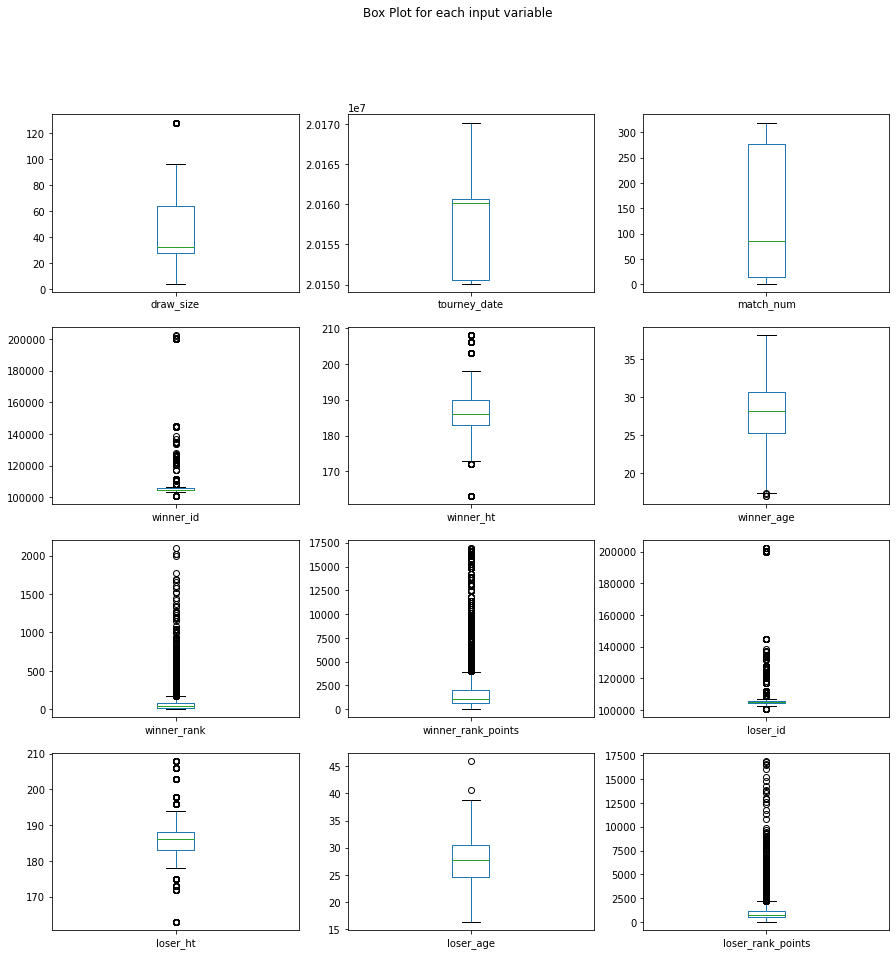

In [32]:
# plot distribution of the input variables to identify outliers
tennis_data.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(15, 15),title='Box Plot for each input variable')
plt.show()

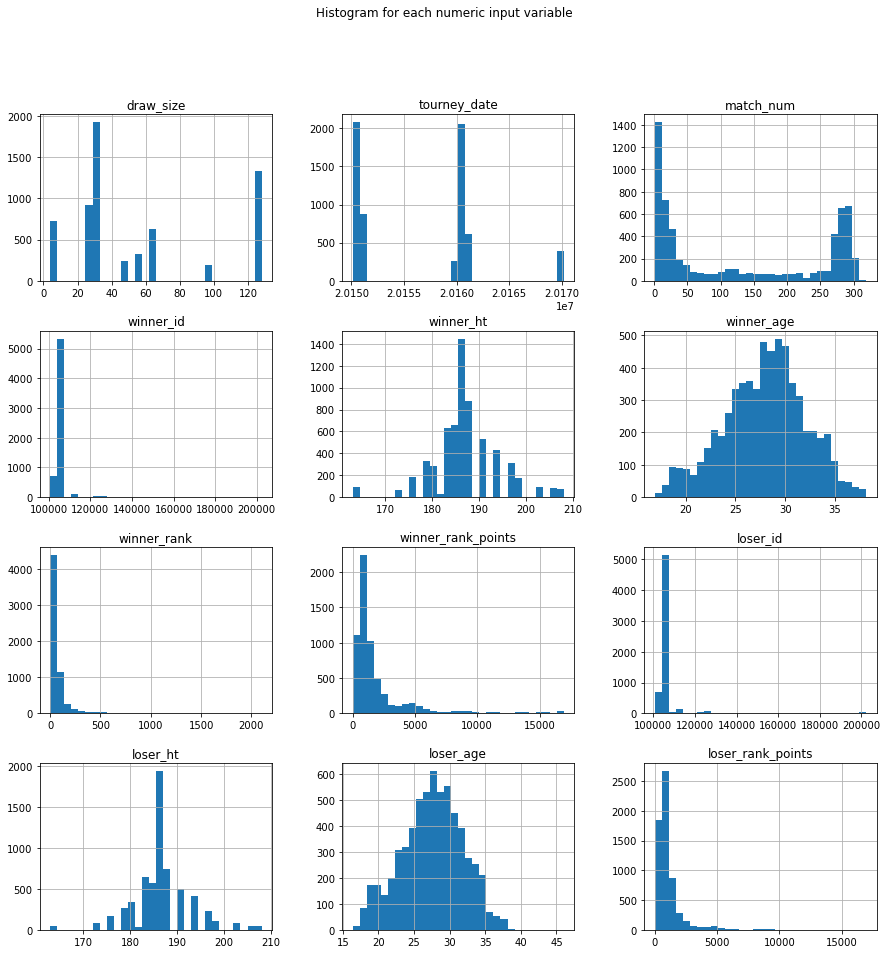

In [33]:
# plot the data disribution in each column
tennis_data.hist(bins=30, figsize=(15,15))
plt.suptitle("Histogram for each numeric input variable")
plt.show()

In [34]:
# drop the rows where there is at least a null values
tennis_data.dropna(axis= 0, how='any', inplace=True)

In [35]:
# calculate number of remaining null values
tennis_data.count()-len(tennis_data)

tourney_name          0
surface               0
draw_size             0
tourney_level         0
tourney_date          0
match_num             0
winner_id             0
winner_name           0
winner_hand           0
winner_ht             0
winner_ioc            0
winner_age            0
winner_rank           0
winner_rank_points    0
loser_id              0
loser_name            0
loser_hand            0
loser_ht              0
loser_ioc             0
loser_age             0
loser_rank_points     0
score                 0
round                 0
dtype: int64

In [36]:
tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 6349
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_name        6128 non-null   object 
 1   surface             6128 non-null   object 
 2   draw_size           6128 non-null   float64
 3   tourney_level       6128 non-null   object 
 4   tourney_date        6128 non-null   float64
 5   match_num           6128 non-null   float64
 6   winner_id           6128 non-null   float64
 7   winner_name         6128 non-null   object 
 8   winner_hand         6128 non-null   object 
 9   winner_ht           6128 non-null   float64
 10  winner_ioc          6128 non-null   object 
 11  winner_age          6128 non-null   float64
 12  winner_rank         6128 non-null   float64
 13  winner_rank_points  6128 non-null   float64
 14  loser_id            6128 non-null   float64
 15  loser_name          6128 non-null   object 
 16  loser_

In [37]:
# to simplify the project, the score will be deleted since it has multiple valuee. 
# And the winner_rank will be deleted because the loser doesn't has one
tennis_data.drop(['score','winner_rank'], axis=1, inplace=True)

In [38]:
tennis_data.head()

,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,winner_age,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank_points,round
0,Tokyo,Hard,32.0,A,20151005.0,1.0,104527.0,Stanislas Wawrinka,R,183.0,...,30.521561,6005.0,103285.0,Radek Stepanek,R,185.0,CZE,36.854209,187.0,R32
1,Tokyo,Hard,32.0,A,20151005.0,2.0,105147.0,Tatsuma Ito,R,180.0,...,27.381246,444.0,106415.0,Yoshihito Nishioka,L,186.0,JPN,20.021903,377.0,R32
2,Tokyo,Hard,32.0,A,20151005.0,3.0,105572.0,Austin Krajicek,L,186.0,...,25.303217,450.0,105051.0,Matthew Ebden,R,188.0,AUS,27.857632,430.0,R32
3,Tokyo,Hard,32.0,A,20151005.0,4.0,105311.0,Joao Sousa,R,186.0,...,26.516085,951.0,103852.0,Feliciano Lopez,L,188.0,ESP,34.039699,2040.0,R32
4,Tokyo,Hard,32.0,A,20151005.0,5.0,104468.0,Gilles Simon,R,183.0,...,30.770705,2530.0,104022.0,Mikhail Youzhny,R,183.0,RUS,33.278576,581.0,R32


In [39]:
# list the dataset columns after deletion
tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6128 entries, 0 to 6349
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_name        6128 non-null   object 
 1   surface             6128 non-null   object 
 2   draw_size           6128 non-null   float64
 3   tourney_level       6128 non-null   object 
 4   tourney_date        6128 non-null   float64
 5   match_num           6128 non-null   float64
 6   winner_id           6128 non-null   float64
 7   winner_name         6128 non-null   object 
 8   winner_hand         6128 non-null   object 
 9   winner_ht           6128 non-null   float64
 10  winner_ioc          6128 non-null   object 
 11  winner_age          6128 non-null   float64
 12  winner_rank_points  6128 non-null   float64
 13  loser_id            6128 non-null   float64
 14  loser_name          6128 non-null   object 
 15  loser_hand          6128 non-null   object 
 16  loser_

In [40]:
# list the round values and count of each value
tennis_data['round'].value_counts()

R32     1889
R16     1093
R64      894
R128     700
RR       583
QF       548
SF       280
F        140
BR         1
Name: round, dtype: int64

In [41]:
# drop row where round == 'BR' because it's the only row with this value in round column
tennis_data.drop(tennis_data[tennis_data['round']=='BR'].index, inplace=True)

In [42]:
tennis_data['round'].value_counts()

R32     1889
R16     1093
R64      894
R128     700
RR       583
QF       548
SF       280
F        140
Name: round, dtype: int64

In [43]:
# list the dataset values after the deletion
tennis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6127 entries, 0 to 6349
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_name        6127 non-null   object 
 1   surface             6127 non-null   object 
 2   draw_size           6127 non-null   float64
 3   tourney_level       6127 non-null   object 
 4   tourney_date        6127 non-null   float64
 5   match_num           6127 non-null   float64
 6   winner_id           6127 non-null   float64
 7   winner_name         6127 non-null   object 
 8   winner_hand         6127 non-null   object 
 9   winner_ht           6127 non-null   float64
 10  winner_ioc          6127 non-null   object 
 11  winner_age          6127 non-null   float64
 12  winner_rank_points  6127 non-null   float64
 13  loser_id            6127 non-null   float64
 14  loser_name          6127 non-null   object 
 15  loser_hand          6127 non-null   object 
 16  loser_

In [44]:
# list the tourney_data values and count of each
tennis_data['tourney_date'].value_counts()

20160718.0    128
20150831.0    127
20160523.0    127
20160627.0    127
20150119.0    127
             ... 
20161114.0     15
20151115.0     15
20161125.0      4
20151127.0      3
20151030.0      1
Name: tourney_date, Length: 90, dtype: int64

In [45]:
# list the tourney_name values and the count of each to identify if any processing is needed
tennis_data['tourney_name'].value_counts()

Australian Open                378
Roland Garros                  254
Wimbledon                      254
Miami Masters                  190
Indian Wells Masters           189
                              ... 
Davis Cup G2 R1: VEN vs CRC      1
Davis Cup G2 R1: PHI vs KUW      1
Davis Cup G2 R2: VIE vs THA      1
Davis Cup G2 PO: ZIM vs MDA      1
Davis Cup G2 R3: PAK vs TPE      1
Name: tourney_name, Length: 239, dtype: int64

After looking into the tourney_name values, there are two types of data in this column, one for the single matches which is the most common type in this column. The other one, is the group matches the starts with the name 'Davis Cup' and followed with the name of the countries. Thus, to make thhe column more readible by the model, a new column will be added under the name single_match that identifies if the match is single or group. an the names of the countries will be deleted

In [46]:
# create a new column and give it '1' as a defult value which means it's a single match
tennis_data['single_match'] = 1

In [47]:
tennis_data.head()

,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,...,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank_points,round,single_match
0,Tokyo,Hard,32.0,A,20151005.0,1.0,104527.0,Stanislas Wawrinka,R,183.0,...,6005.0,103285.0,Radek Stepanek,R,185.0,CZE,36.854209,187.0,R32,1
1,Tokyo,Hard,32.0,A,20151005.0,2.0,105147.0,Tatsuma Ito,R,180.0,...,444.0,106415.0,Yoshihito Nishioka,L,186.0,JPN,20.021903,377.0,R32,1
2,Tokyo,Hard,32.0,A,20151005.0,3.0,105572.0,Austin Krajicek,L,186.0,...,450.0,105051.0,Matthew Ebden,R,188.0,AUS,27.857632,430.0,R32,1
3,Tokyo,Hard,32.0,A,20151005.0,4.0,105311.0,Joao Sousa,R,186.0,...,951.0,103852.0,Feliciano Lopez,L,188.0,ESP,34.039699,2040.0,R32,1
4,Tokyo,Hard,32.0,A,20151005.0,5.0,104468.0,Gilles Simon,R,183.0,...,2530.0,104022.0,Mikhail Youzhny,R,183.0,RUS,33.278576,581.0,R32,1


In [48]:
# reorganize the columns to make the single_match column after the tourney_name column
tennis_data = pd.concat([tennis_data['tourney_name'], tennis_data['single_match'], tennis_data[tennis_data.columns[1:-1]]], axis=1)
tennis_data

,tourney_name,single_match,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,winner_age,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank_points,round
0,Tokyo,1,Hard,32.0,A,20151005.0,1.0,104527.0,Stanislas Wawrinka,R,...,30.521561,6005.0,103285.0,Radek Stepanek,R,185.0,CZE,36.854209,187.0,R32
1,Tokyo,1,Hard,32.0,A,20151005.0,2.0,105147.0,Tatsuma Ito,R,...,27.381246,444.0,106415.0,Yoshihito Nishioka,L,186.0,JPN,20.021903,377.0,R32
2,Tokyo,1,Hard,32.0,A,20151005.0,3.0,105572.0,Austin Krajicek,L,...,25.303217,450.0,105051.0,Matthew Ebden,R,188.0,AUS,27.857632,430.0,R32
3,Tokyo,1,Hard,32.0,A,20151005.0,4.0,105311.0,Joao Sousa,R,...,26.516085,951.0,103852.0,Feliciano Lopez,L,188.0,ESP,34.039699,2040.0,R32
4,Tokyo,1,Hard,32.0,A,20151005.0,5.0,104468.0,Gilles Simon,R,...,30.770705,2530.0,104022.0,Mikhail Youzhny,R,183.0,RUS,33.278576,581.0,R32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,Davis Cup WG R1: RUS vs SRB,1,Hard,4.0,D,20170203.0,2.0,104925.0,Novak Djokovic,R,...,29.694730,9825.0,106421.0,Daniil Medvedev,R,186.0,RUS,20.969199,749.0,RR
6346,Davis Cup WG R1: SUI vs USA,1,Hard,4.0,D,20170203.0,1.0,106058.0,Jack Sock,R,...,24.350445,1855.0,103843.0,Marco Chiudinelli,R,185.0,SUI,35.389459,414.0,RR
6347,Davis Cup WG R1: SUI vs USA,1,Hard,4.0,D,20170203.0,2.0,104545.0,John Isner,R,...,31.764545,1715.0,105967.0,Henri Laaksonen,R,186.0,SUI,24.835044,473.0,RR
6348,Davis Cup WG R1: SUI vs USA,1,Hard,4.0,D,20170203.0,4.0,105023.0,Sam Querrey,R,...,29.316906,1435.0,104847.0,Adrien Bossel,L,186.0,SUI,30.091718,78.0,RR


In [49]:
# test the function that will be used for the splitting
tennis_data.iloc[6100].tourney_name.split(':')

['Davis Cup WG R1', ' ARG vs ITA']

In [50]:
# test the function that will be used for the splitting
tennis_data.iloc[6100].tourney_name.split(':')[1]

' ARG vs ITA'

In [51]:
# split the name of the tourney_name if the name starts with 'Davis Cup' then keep only the complete name of the tourney
for r in range(len(tennis_data)):
    if tennis_data.iloc[r].tourney_name.startswith('Davis Cup '):
        tennis_data.iloc[r,0] = tennis_data.iloc[r].tourney_name.split(':')[0]
        tennis_data.iloc[r,1] = 0

In [52]:
tennis_data

,tourney_name,single_match,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,winner_age,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank_points,round
0,Tokyo,1,Hard,32.0,A,20151005.0,1.0,104527.0,Stanislas Wawrinka,R,...,30.521561,6005.0,103285.0,Radek Stepanek,R,185.0,CZE,36.854209,187.0,R32
1,Tokyo,1,Hard,32.0,A,20151005.0,2.0,105147.0,Tatsuma Ito,R,...,27.381246,444.0,106415.0,Yoshihito Nishioka,L,186.0,JPN,20.021903,377.0,R32
2,Tokyo,1,Hard,32.0,A,20151005.0,3.0,105572.0,Austin Krajicek,L,...,25.303217,450.0,105051.0,Matthew Ebden,R,188.0,AUS,27.857632,430.0,R32
3,Tokyo,1,Hard,32.0,A,20151005.0,4.0,105311.0,Joao Sousa,R,...,26.516085,951.0,103852.0,Feliciano Lopez,L,188.0,ESP,34.039699,2040.0,R32
4,Tokyo,1,Hard,32.0,A,20151005.0,5.0,104468.0,Gilles Simon,R,...,30.770705,2530.0,104022.0,Mikhail Youzhny,R,183.0,RUS,33.278576,581.0,R32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,104925.0,Novak Djokovic,R,...,29.694730,9825.0,106421.0,Daniil Medvedev,R,186.0,RUS,20.969199,749.0,RR
6346,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,1.0,106058.0,Jack Sock,R,...,24.350445,1855.0,103843.0,Marco Chiudinelli,R,185.0,SUI,35.389459,414.0,RR
6347,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,104545.0,John Isner,R,...,31.764545,1715.0,105967.0,Henri Laaksonen,R,186.0,SUI,24.835044,473.0,RR
6348,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,4.0,105023.0,Sam Querrey,R,...,29.316906,1435.0,104847.0,Adrien Bossel,L,186.0,SUI,30.091718,78.0,RR


In [53]:
# calculate the number of group matches
tennis_data['tourney_name'].str.startswith('Davis Cup ').sum()

547

In [54]:
# list the values in the toureny_name and the count of each
tennis_data['tourney_name'].value_counts()

Australian Open           378
Wimbledon                 254
Roland Garros             254
Miami Masters             190
Indian Wells Masters      189
                         ... 
Davis Cup G2 PO            16
Davis Cup WG SF            15
Challenger Tour Finals     15
Tour Finals                15
Davis Cup WG F              7
Name: tourney_name, Length: 87, dtype: int64

In [55]:
# list the values in the toureny_name
i = 0
for t in tennis_data['tourney_name'].value_counts().index:
    print("{} is {}".format(i, t))
    i+=1

0 is Australian Open
1 is Wimbledon
2 is Roland Garros
3 is Miami Masters
4 is Indian Wells Masters
5 is US Open
6 is Us Open
7 is Madrid Masters
8 is Canada Masters
9 is Rome Masters
10 is Shanghai Masters
11 is Cincinnati Masters
12 is Monte Carlo Masters
13 is Davis Cup G2 R1
14 is Nottingham
15 is Washington
16 is Barcelona
17 is Winston-Salem
18 is Paris Masters
19 is Doha
20 is Davis Cup WG R1
21 is Chennai
22 is Sydney
23 is Davis Cup G1 R1
24 is Brisbane
25 is Auckland
26 is London
27 is Halle
28 is Dubai
29 is Delray Beach
30 is Vienna
31 is Acapulco
32 is Rotterdam
33 is Olympics
34 is Rio de Janeiro
35 is Basel
36 is Tokyo
37 is Beijing
38 is Hamburg
39 is Davis Cup G1 R2
40 is Newport
41 is Davis Cup WG PO
42 is Quito
43 is Bastad
44 is Istanbul
45 is Bucharest
46 is Moscow
47 is Nice
48 is Shenzhen
49 is Munich
50 is Umag
51 is Marseille
52 is Montpellier
53 is s-Hertogenbosch
54 is Geneva
55 is Estoril
56 is Buenos Aires
57 is Kitzbuhel
58 is Gstaad
59 is Memphis
60 is Sa

In [56]:
# calculate number of single and group matches
tennis_data['single_match'].value_counts()

1    5580
0     547
Name: single_match, dtype: int64

# Preperation

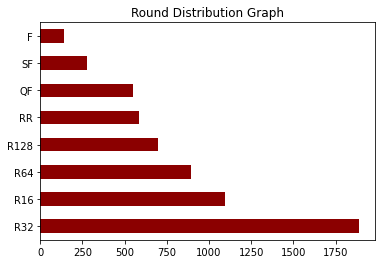

In [57]:
# plot the round values
tennis_data['round'].value_counts().plot(kind='barh', color='darkred', title='Round Distribution Graph');

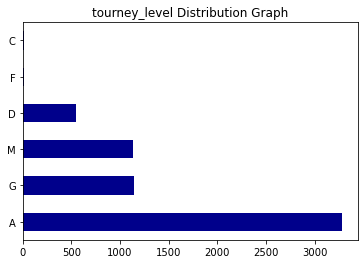

In [58]:
# plot the tourney_level values
tennis_data['tourney_level'].value_counts().plot(kind='barh', color='darkblue', title='tourney_level Distribution Graph');

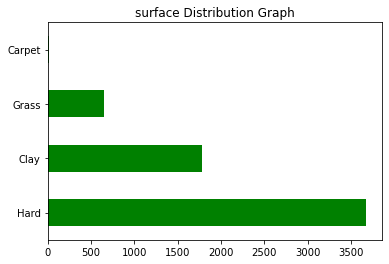

In [59]:
# plot the surface values
tennis_data['surface'].value_counts().plot(kind='barh', color='green', title='surface Distribution Graph');

In [60]:
# find Who's the most frequent winning name?  
tennis_data['winner_name'].value_counts().idxmax()

'Andy Murray'

In [120]:
tennis_data['winner_name'].value_counts().to_frame()

,winner_name
Andy Murray,158
Novak Djokovic,156
Kei Nishikori,118
Rafael Nadal,109
Stanislas Wawrinka,107
...,...
Alexandre Sidorenko,1
Jan Satral,1
Matteo Donati,1
Warit Sornbutnark,1


In [61]:
# split the dataset into two datasets to start shuffle between the winner and loser 
# and change the column names to player 1 and player 2 

tennis_data_1 = tennis_data.iloc[:int(len(tennis_data)/2),:]
tennis_data_2 = tennis_data.iloc[len(tennis_data_1):,:]

In [62]:
# make sure the splitting was done correctly
print(len(tennis_data_1))
print(len(tennis_data_2))
print(len(tennis_data_1)+len(tennis_data_2))

3063
3064
6127


In [63]:
# create a new column to indicate if the player1 wins or not by using '1' for win and '0' for lose 
# for the first dataset, the player1 is the winner
# for the second dataset, the loser is the player1 
tennis_data_1['player1_winner'] = 1
tennis_data_2['player1_winner'] = 0

<ipython-input-63-0bb79db068e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tennis_data_1['player1_winner'] = 1
<ipython-input-63-0bb79db068e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tennis_data_2['player1_winner'] = 0


In [64]:
# display the first dataset 
tennis_data_1


,tourney_name,single_match,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank_points,round,player1_winner
0,Tokyo,1,Hard,32.0,A,20151005.0,1.0,104527.0,Stanislas Wawrinka,R,...,6005.0,103285.0,Radek Stepanek,R,185.0,CZE,36.854209,187.0,R32,1
1,Tokyo,1,Hard,32.0,A,20151005.0,2.0,105147.0,Tatsuma Ito,R,...,444.0,106415.0,Yoshihito Nishioka,L,186.0,JPN,20.021903,377.0,R32,1
2,Tokyo,1,Hard,32.0,A,20151005.0,3.0,105572.0,Austin Krajicek,L,...,450.0,105051.0,Matthew Ebden,R,188.0,AUS,27.857632,430.0,R32,1
3,Tokyo,1,Hard,32.0,A,20151005.0,4.0,105311.0,Joao Sousa,R,...,951.0,103852.0,Feliciano Lopez,L,188.0,ESP,34.039699,2040.0,R32,1
4,Tokyo,1,Hard,32.0,A,20151005.0,5.0,104468.0,Gilles Simon,R,...,2530.0,104022.0,Mikhail Youzhny,R,183.0,RUS,33.278576,581.0,R32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,Australian Open,1,Hard,128.0,G,20160118.0,129.0,104655.0,Pablo Cuevas,R,...,1065.0,106415.0,Yoshihito Nishioka,L,186.0,JPN,20.309377,501.0,R128,1
3127,Australian Open,1,Hard,128.0,G,20160118.0,130.0,105806.0,Mirza Basic,R,...,432.0,104898.0,Robin Haase,R,190.0,NED,28.785763,762.0,R128,1
3128,Australian Open,1,Hard,128.0,G,20160118.0,131.0,104607.0,Tomas Berdych,R,...,4560.0,106026.0,Yuki Bhambri,R,183.0,IND,23.540041,610.0,R128,1
3129,Australian Open,1,Hard,128.0,G,20160118.0,132.0,104269.0,Fernando Verdasco,L,...,900.0,104745.0,Rafael Nadal,L,185.0,ESP,29.626283,5230.0,R128,1


In [65]:
# change the columns names by changing the winner to player1 and loser to player2
tennis_data_1.columns = ['tourney_name', 'single_match', 'surface', 'draw_size', 'tourney_level',
       'tourney_date','match_num', 'player1_id', 'player1_name', 'player1_hand',
       'player1_ht', 'player1_ioc', 'player1_age', 'player1_rank_points', 'player2_id', 'player2_name', 'player2_hand',
       'player2_ht', 'player2_ioc', 'player2_age',
       'player2_rank_points', 'round',
       'player1_winner']

In [66]:
# display the second dataset
tennis_data_2

,tourney_name,single_match,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,...,winner_rank_points,loser_id,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank_points,round,player1_winner
3131,Australian Open,1,Hard,128.0,G,20160118.0,134.0,105723.0,Andrey Kuznetsov,R,...,693.0,105992.0,Ryan Harrison,R,183.0,USA,23.698836,448.0,R128,0
3132,Australian Open,1,Hard,128.0,G,20160118.0,135.0,104871.0,Jeremy Chardy,R,...,1255.0,105208.0,Ernests Gulbis,R,190.0,LAT,27.383984,661.0,R128,0
3133,Australian Open,1,Hard,128.0,G,20160118.0,136.0,104792.0,Gael Monfils,R,...,1485.0,105216.0,Yuichi Sugita,R,186.0,JPN,27.331964,481.0,R128,0
3134,Australian Open,1,Hard,128.0,G,20160118.0,137.0,103917.0,Nicolas Mahut,R,...,767.0,106065.0,Marco Cecchinato,R,186.0,ITA,23.299110,618.0,R128,0
3135,Australian Open,1,Hard,128.0,G,20160118.0,138.0,103565.0,Stephane Robert,R,...,233.0,106216.0,Bjorn Fratangelo,R,186.0,USA,22.499658,458.0,R128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,104925.0,Novak Djokovic,R,...,9825.0,106421.0,Daniil Medvedev,R,186.0,RUS,20.969199,749.0,RR,0
6346,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,1.0,106058.0,Jack Sock,R,...,1855.0,103843.0,Marco Chiudinelli,R,185.0,SUI,35.389459,414.0,RR,0
6347,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,104545.0,John Isner,R,...,1715.0,105967.0,Henri Laaksonen,R,186.0,SUI,24.835044,473.0,RR,0
6348,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,4.0,105023.0,Sam Querrey,R,...,1435.0,104847.0,Adrien Bossel,L,186.0,SUI,30.091718,78.0,RR,0


In [67]:
# display the second dataset columns
tennis_data_2.columns

Index(['tourney_name', 'single_match', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank_points',
       'loser_id', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank_points', 'round', 'player1_winner'],
      dtype='object')

In [68]:
tennis_data_2.columns[:7]

Index(['tourney_name', 'single_match', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num'],
      dtype='object')

In [69]:
tennis_data_2.columns[14:-2]

Index(['loser_id', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank_points'],
      dtype='object')

In [70]:
tennis_data_2.columns[7:14]

Index(['winner_id', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc',
       'winner_age', 'winner_rank_points'],
      dtype='object')

In [71]:
tennis_data_2.columns[-2:]

Index(['round', 'player1_winner'], dtype='object')

In [72]:
# reorganize the dataset columns to replace the winner columns with the loser ones
tennis_data_2 = pd.concat([tennis_data_2[tennis_data_2.columns[:7]], tennis_data_2[tennis_data_2.columns[14:-2]], tennis_data_2[tennis_data_2.columns[7:14]], tennis_data_2[tennis_data_2.columns[-2:]]], axis=1)
tennis_data_2

,tourney_name,single_match,surface,draw_size,tourney_level,tourney_date,match_num,loser_id,loser_name,loser_hand,...,loser_rank_points,winner_id,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank_points,round,player1_winner
3131,Australian Open,1,Hard,128.0,G,20160118.0,134.0,105992.0,Ryan Harrison,R,...,448.0,105723.0,Andrey Kuznetsov,R,185.0,RUS,24.903491,693.0,R128,0
3132,Australian Open,1,Hard,128.0,G,20160118.0,135.0,105208.0,Ernests Gulbis,R,...,661.0,104871.0,Jeremy Chardy,R,188.0,FRA,28.930869,1255.0,R128,0
3133,Australian Open,1,Hard,128.0,G,20160118.0,136.0,105216.0,Yuichi Sugita,R,...,481.0,104792.0,Gael Monfils,R,193.0,FRA,29.379877,1485.0,R128,0
3134,Australian Open,1,Hard,128.0,G,20160118.0,137.0,106065.0,Marco Cecchinato,R,...,618.0,103917.0,Nicolas Mahut,R,190.0,FRA,33.990418,767.0,R128,0
3135,Australian Open,1,Hard,128.0,G,20160118.0,138.0,106216.0,Bjorn Fratangelo,R,...,458.0,103565.0,Stephane Robert,R,185.0,FRA,35.671458,233.0,R128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,106421.0,Daniil Medvedev,R,...,749.0,104925.0,Novak Djokovic,R,188.0,SRB,29.694730,9825.0,RR,0
6346,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,1.0,103843.0,Marco Chiudinelli,R,...,414.0,106058.0,Jack Sock,R,185.0,USA,24.350445,1855.0,RR,0
6347,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,105967.0,Henri Laaksonen,R,...,473.0,104545.0,John Isner,R,206.0,USA,31.764545,1715.0,RR,0
6348,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,4.0,104847.0,Adrien Bossel,L,...,78.0,105023.0,Sam Querrey,R,198.0,USA,29.316906,1435.0,RR,0


In [73]:
# change the second dataset column names by changing loser with player1 and winner with player2
tennis_data_2.columns = ['tourney_name', 'single_match', 'surface', 'draw_size', 'tourney_level',
       'tourney_date','match_num', 'player1_id', 'player1_name', 'player1_hand',
       'player1_ht', 'player1_ioc', 'player1_age', 'player1_rank_points', 'player2_id', 'player2_name', 'player2_hand',
       'player2_ht', 'player2_ioc', 'player2_age',
       'player2_rank_points', 'round',
       'player1_winner']

In [74]:
# display the dataset after changes
tennis_data_2

,tourney_name,single_match,surface,draw_size,tourney_level,tourney_date,match_num,player1_id,player1_name,player1_hand,...,player1_rank_points,player2_id,player2_name,player2_hand,player2_ht,player2_ioc,player2_age,player2_rank_points,round,player1_winner
3131,Australian Open,1,Hard,128.0,G,20160118.0,134.0,105992.0,Ryan Harrison,R,...,448.0,105723.0,Andrey Kuznetsov,R,185.0,RUS,24.903491,693.0,R128,0
3132,Australian Open,1,Hard,128.0,G,20160118.0,135.0,105208.0,Ernests Gulbis,R,...,661.0,104871.0,Jeremy Chardy,R,188.0,FRA,28.930869,1255.0,R128,0
3133,Australian Open,1,Hard,128.0,G,20160118.0,136.0,105216.0,Yuichi Sugita,R,...,481.0,104792.0,Gael Monfils,R,193.0,FRA,29.379877,1485.0,R128,0
3134,Australian Open,1,Hard,128.0,G,20160118.0,137.0,106065.0,Marco Cecchinato,R,...,618.0,103917.0,Nicolas Mahut,R,190.0,FRA,33.990418,767.0,R128,0
3135,Australian Open,1,Hard,128.0,G,20160118.0,138.0,106216.0,Bjorn Fratangelo,R,...,458.0,103565.0,Stephane Robert,R,185.0,FRA,35.671458,233.0,R128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,106421.0,Daniil Medvedev,R,...,749.0,104925.0,Novak Djokovic,R,188.0,SRB,29.694730,9825.0,RR,0
6346,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,1.0,103843.0,Marco Chiudinelli,R,...,414.0,106058.0,Jack Sock,R,185.0,USA,24.350445,1855.0,RR,0
6347,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,105967.0,Henri Laaksonen,R,...,473.0,104545.0,John Isner,R,206.0,USA,31.764545,1715.0,RR,0
6348,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,4.0,104847.0,Adrien Bossel,L,...,78.0,105023.0,Sam Querrey,R,198.0,USA,29.316906,1435.0,RR,0


In [75]:
# list first dataset columns' values
tennis_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3063 entries, 0 to 3130
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tourney_name         3063 non-null   object 
 1   single_match         3063 non-null   int64  
 2   surface              3063 non-null   object 
 3   draw_size            3063 non-null   float64
 4   tourney_level        3063 non-null   object 
 5   tourney_date         3063 non-null   float64
 6   match_num            3063 non-null   float64
 7   player1_id           3063 non-null   float64
 8   player1_name         3063 non-null   object 
 9   player1_hand         3063 non-null   object 
 10  player1_ht           3063 non-null   float64
 11  player1_ioc          3063 non-null   object 
 12  player1_age          3063 non-null   float64
 13  player1_rank_points  3063 non-null   float64
 14  player2_id           3063 non-null   float64
 15  player2_name         3063 non-null   o

In [76]:
# koin the first and second datasets
tennis_data_joned = tennis_data_1.append(tennis_data_2)

In [77]:
# display the dataset after the join
tennis_data_joned

,tourney_name,single_match,surface,draw_size,tourney_level,tourney_date,match_num,player1_id,player1_name,player1_hand,...,player1_rank_points,player2_id,player2_name,player2_hand,player2_ht,player2_ioc,player2_age,player2_rank_points,round,player1_winner
0,Tokyo,1,Hard,32.0,A,20151005.0,1.0,104527.0,Stanislas Wawrinka,R,...,6005.0,103285.0,Radek Stepanek,R,185.0,CZE,36.854209,187.0,R32,1
1,Tokyo,1,Hard,32.0,A,20151005.0,2.0,105147.0,Tatsuma Ito,R,...,444.0,106415.0,Yoshihito Nishioka,L,186.0,JPN,20.021903,377.0,R32,1
2,Tokyo,1,Hard,32.0,A,20151005.0,3.0,105572.0,Austin Krajicek,L,...,450.0,105051.0,Matthew Ebden,R,188.0,AUS,27.857632,430.0,R32,1
3,Tokyo,1,Hard,32.0,A,20151005.0,4.0,105311.0,Joao Sousa,R,...,951.0,103852.0,Feliciano Lopez,L,188.0,ESP,34.039699,2040.0,R32,1
4,Tokyo,1,Hard,32.0,A,20151005.0,5.0,104468.0,Gilles Simon,R,...,2530.0,104022.0,Mikhail Youzhny,R,183.0,RUS,33.278576,581.0,R32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,106421.0,Daniil Medvedev,R,...,749.0,104925.0,Novak Djokovic,R,188.0,SRB,29.694730,9825.0,RR,0
6346,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,1.0,103843.0,Marco Chiudinelli,R,...,414.0,106058.0,Jack Sock,R,185.0,USA,24.350445,1855.0,RR,0
6347,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,2.0,105967.0,Henri Laaksonen,R,...,473.0,104545.0,John Isner,R,206.0,USA,31.764545,1715.0,RR,0
6348,Davis Cup WG R1,0,Hard,4.0,D,20170203.0,4.0,104847.0,Adrien Bossel,L,...,78.0,105023.0,Sam Querrey,R,198.0,USA,29.316906,1435.0,RR,0


In [78]:
# drop the names columns and will use players ids instead. and drop player locations since it'll make the model more cmplex
tennis_data_joned.drop(['player1_name', 'player1_ioc', 'player2_name', 'player2_ioc'], axis=1, inplace=True)

In [79]:
# list surface values
tennis_data_joned['surface'].value_counts()

Hard      3678
Clay      1786
Grass      650
Carpet      13
Name: surface, dtype: int64

In [80]:
# Encode the 'surface' data to numerical values
# Hard   => 1
# Clay   => 2
# Grass   => 3
# Carpet  => 4


tennis_data_joned['surface'] = tennis_data_joned['surface'].map({"Hard":1, "Clay":2, "Grass":3, "Carpet":4})

In [81]:
# list surface values after 
tennis_data_joned['surface'].value_counts()

1    3678
2    1786
3     650
4      13
Name: surface, dtype: int64

In [82]:
# list the round values
tennis_data_joned['round'].value_counts()

R32     1889
R16     1093
R64      894
R128     700
RR       583
QF       548
SF       280
F        140
Name: round, dtype: int64

In [83]:
# Encode the 'round' data to numerical values
# R32   => 3
# R16   => 4
# R64   => 2
# R128  => 1
# RR    => 0
# QF    => 5
# SF    => 6
# F     => 7

tennis_data_joned['round'] = tennis_data_joned['round'].map({"RR":0, "R128":1, "R64":2, "R32":3, "R16":4, "QF":5, "SF":6, "F":7})

In [84]:
# list the tourney_level values
tennis_data_joned['tourney_level'].value_counts()

A    3279
G    1140
M    1131
D     547
F      15
C      15
Name: tourney_level, dtype: int64

In [85]:
# Encode the 'tourney_level' data to numerical values
# A   => 0
# G   => 1
# M   => 2
# D   => 3
# C   => 4
# F   => 5

tennis_data_joned['tourney_level'] = tennis_data_joned['tourney_level'].map({"A":0, "G":1, "M":2, "D":3, "C":4, "F":5})

In [86]:
# list the tourney_level after
tennis_data_joned['tourney_level'].value_counts()

0    3279
1    1140
2    1131
3     547
4      15
5      15
Name: tourney_level, dtype: int64

In [87]:
# list the tourney_name column
tennis_data_joned['tourney_name'].value_counts()

Australian Open           378
Wimbledon                 254
Roland Garros             254
Miami Masters             190
Indian Wells Masters      189
                         ... 
Davis Cup G2 PO            16
Davis Cup WG SF            15
Challenger Tour Finals     15
Tour Finals                15
Davis Cup WG F              7
Name: tourney_name, Length: 87, dtype: int64

In [88]:
# drop the tourney_name column
tennis_data_joned = tennis_data_joned.drop(['tourney_name'], axis=1)

In [89]:
# Encode the 'hand' data to numerical values
# R => 0
# L => 1
# U => 2
tennis_data_joned['player1_hand'] = tennis_data_joned['player1_hand'].map({"R":0, "L":1, "U":2})
tennis_data_joned['player2_hand'] = tennis_data_joned['player2_hand'].map({"R":0, "L":1, "U":2})

In [90]:
# list round values after
tennis_data_joned['round'].value_counts()

3    1889
4    1093
2     894
1     700
0     583
5     548
6     280
7     140
Name: round, dtype: int64

In [91]:
# list the player1_hand values after the mapping
tennis_data_joned['player1_hand'].value_counts()

0    5113
1     866
2     148
Name: player1_hand, dtype: int64

In [92]:
# list the player2_hand values after the mapping
tennis_data_joned['player2_hand'].value_counts()

0    5097
1     862
2     168
Name: player2_hand, dtype: int64

In [93]:
tennis_data_joned.columns

Index(['single_match', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'player1_id', 'player1_hand', 'player1_ht', 'player1_age',
       'player1_rank_points', 'player2_id', 'player2_hand', 'player2_ht',
       'player2_age', 'player2_rank_points', 'round', 'player1_winner'],
      dtype='object')

In [94]:
tennis_data_joned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6127 entries, 0 to 6349
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   single_match         6127 non-null   int64  
 1   surface              6127 non-null   int64  
 2   draw_size            6127 non-null   float64
 3   tourney_level        6127 non-null   int64  
 4   tourney_date         6127 non-null   float64
 5   match_num            6127 non-null   float64
 6   player1_id           6127 non-null   float64
 7   player1_hand         6127 non-null   int64  
 8   player1_ht           6127 non-null   float64
 9   player1_age          6127 non-null   float64
 10  player1_rank_points  6127 non-null   float64
 11  player2_id           6127 non-null   float64
 12  player2_hand         6127 non-null   int64  
 13  player2_ht           6127 non-null   float64
 14  player2_age          6127 non-null   float64
 15  player2_rank_points  6127 non-null   f

In [95]:
# convert the numerical values to integer 
for i in tennis_data_joned.columns:
    tennis_data_joned[i] = tennis_data_joned[i].astype(int)

In [96]:
tennis_data_joned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6127 entries, 0 to 6349
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   single_match         6127 non-null   int32
 1   surface              6127 non-null   int32
 2   draw_size            6127 non-null   int32
 3   tourney_level        6127 non-null   int32
 4   tourney_date         6127 non-null   int32
 5   match_num            6127 non-null   int32
 6   player1_id           6127 non-null   int32
 7   player1_hand         6127 non-null   int32
 8   player1_ht           6127 non-null   int32
 9   player1_age          6127 non-null   int32
 10  player1_rank_points  6127 non-null   int32
 11  player2_id           6127 non-null   int32
 12  player2_hand         6127 non-null   int32
 13  player2_ht           6127 non-null   int32
 14  player2_age          6127 non-null   int32
 15  player2_rank_points  6127 non-null   int32
 16  round                612

In [97]:
result = tennis_data_joned['player1_winner']
input_list = tennis_data_joned.drop(['player1_winner'], axis=1)

In [98]:
input_list.head()

,single_match,surface,draw_size,tourney_level,tourney_date,match_num,player1_id,player1_hand,player1_ht,player1_age,player1_rank_points,player2_id,player2_hand,player2_ht,player2_age,player2_rank_points,round
0,1,1,32,0,20151005,1,104527,0,183,30,6005,103285,0,185,36,187,3
1,1,1,32,0,20151005,2,105147,0,180,27,444,106415,1,186,20,377,3
2,1,1,32,0,20151005,3,105572,1,186,25,450,105051,0,188,27,430,3
3,1,1,32,0,20151005,4,105311,0,186,26,951,103852,1,188,34,2040,3
4,1,1,32,0,20151005,5,104468,0,183,30,2530,104022,0,183,33,581,3


In [99]:
input_list.columns

Index(['single_match', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'player1_id', 'player1_hand', 'player1_ht', 'player1_age',
       'player1_rank_points', 'player2_id', 'player2_hand', 'player2_ht',
       'player2_age', 'player2_rank_points', 'round'],
      dtype='object')

In [100]:
# replace categorical values with 0 and 1 using get_dummies() function
tennis_data_input = pd.get_dummies(input_list)

In [101]:
tennis_data_input.head()

,single_match,surface,draw_size,tourney_level,tourney_date,match_num,player1_id,player1_hand,player1_ht,player1_age,player1_rank_points,player2_id,player2_hand,player2_ht,player2_age,player2_rank_points,round
0,1,1,32,0,20151005,1,104527,0,183,30,6005,103285,0,185,36,187,3
1,1,1,32,0,20151005,2,105147,0,180,27,444,106415,1,186,20,377,3
2,1,1,32,0,20151005,3,105572,1,186,25,450,105051,0,188,27,430,3
3,1,1,32,0,20151005,4,105311,0,186,26,951,103852,1,188,34,2040,3
4,1,1,32,0,20151005,5,104468,0,183,30,2530,104022,0,183,33,581,3


In [102]:
input_list.iloc[1770]

single_match                  1
surface                       1
draw_size                    48
tourney_level                 0
tourney_date           20150803
match_num                     2
player1_id               105575
player1_hand                  0
player1_ht                  175
player1_age                  25
player1_rank_points         586
player2_id               104229
player2_hand                  0
player2_ht                  180
player2_age                  31
player2_rank_points         649
round                         2
Name: 1771, dtype: int32

In [103]:
tennis_data_input.iloc[1770]

single_match                  1
surface                       1
draw_size                    48
tourney_level                 0
tourney_date           20150803
match_num                     2
player1_id               105575
player1_hand                  0
player1_ht                  175
player1_age                  25
player1_rank_points         586
player2_id               104229
player2_hand                  0
player2_ht                  180
player2_age                  31
player2_rank_points         649
round                         2
Name: 1771, dtype: int32

In [104]:
col_new = tennis_data_input.columns
for i in col_new:
    print(i)

single_match
surface
draw_size
tourney_level
tourney_date
match_num
player1_id
player1_hand
player1_ht
player1_age
player1_rank_points
player2_id
player2_hand
player2_ht
player2_age
player2_rank_points
round


In [105]:
tennis_data_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6127 entries, 0 to 6349
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   single_match         6127 non-null   int32
 1   surface              6127 non-null   int32
 2   draw_size            6127 non-null   int32
 3   tourney_level        6127 non-null   int32
 4   tourney_date         6127 non-null   int32
 5   match_num            6127 non-null   int32
 6   player1_id           6127 non-null   int32
 7   player1_hand         6127 non-null   int32
 8   player1_ht           6127 non-null   int32
 9   player1_age          6127 non-null   int32
 10  player1_rank_points  6127 non-null   int32
 11  player2_id           6127 non-null   int32
 12  player2_hand         6127 non-null   int32
 13  player2_ht           6127 non-null   int32
 14  player2_age          6127 non-null   int32
 15  player2_rank_points  6127 non-null   int32
 16  round                612

# Build Modeling

In [106]:
# Split the 'result' and 'tennis_data_input' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tennis_data_input, 
                                                    result, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4901 samples.
Testing set has 1226 samples.


In [107]:
classification_model_1 = DecisionTreeClassifier(random_state=0)

model_1 = classification_model_1.fit(X_train, y_train)
pred_test = model_1.predict(X_test)
pred_train = model_1.predict(X_train)

print("Accuracy score on test sample: {}".format(accuracy_score(y_test, pred_test)))
print("Accuracy score on train sample: {}".format(accuracy_score(y_train, pred_train)))

print("f--score on test sample: {}".format(fbeta_score(y_test[:500], pred_test[:500], beta=1)))
print("f-score on test sample: {}".format(fbeta_score(y_train[:500], pred_train[:500], beta=1)))

Accuracy score on test sample: 0.9991843393148451
Accuracy score on train sample: 1.0
f--score on test sample: 1.0
f-score on test sample: 1.0


In [108]:
classification_model_2 = GaussianNB()

model_2 = classification_model_2.fit(X_train, y_train)
pred_test = model_2.predict(X_test)
pred_train = model_2.predict(X_train)

print("Accuracy score on test sample: {}".format(accuracy_score(y_test, pred_test)))
print("Accuracy score on train sample: {}".format(accuracy_score(y_train, pred_train)))

print("f--score on test sample: {}".format(fbeta_score(y_test[:500], pred_test[:500], beta=1)))
print("f-score on test sample: {}".format(fbeta_score(y_train[:500], pred_train[:500], beta=1)))

Accuracy score on test sample: 0.9584013050570962
Accuracy score on train sample: 0.9602122015915119
f--score on test sample: 0.9376257545271629
f-score on test sample: 0.963531669865643


In [109]:
classification_model_3 = SVC(random_state=41)


model_3 = classification_model_3.fit(X_train, y_train)
pred_test = model_3.predict(X_test)
pred_train = model_3.predict(X_train)

print("Accuracy score on test sample: {}".format(accuracy_score(y_test, pred_test)))
print("Accuracy score on train sample: {}".format(accuracy_score(y_train, pred_train)))

print("f--score on test sample: {}".format(fbeta_score(y_test[:500], pred_test[:500], beta=1)))
print("f-score on test sample: {}".format(fbeta_score(y_train[:500], pred_train[:500], beta=1)))

Accuracy score on test sample: 0.4926590538336052
Accuracy score on train sample: 0.5017343399306264
f--score on test sample: 0.6893840104849279
f-score on test sample: 0.6979166666666667


In [110]:
tennis_data_joned['match_num'].value_counts()

1      217
2      211
4      197
3      137
5      117
      ... 
312      1
308      1
228      1
232      1
319      1
Name: match_num, Length: 316, dtype: int64

In [111]:
tennis_data_joned[tennis_data_joned['tourney_date']==20150831]

,single_match,surface,draw_size,tourney_level,tourney_date,match_num,player1_id,player1_hand,player1_ht,player1_age,player1_rank_points,player2_id,player2_hand,player2_ht,player2_age,player2_rank_points,round,player1_winner
1024,1,1,128,1,20150831,1,104925,0,188,28,14865,105154,0,193,27,554,1,1
1025,1,1,128,1,20150831,2,104890,0,190,28,870,105577,0,193,25,1000,1,1
1026,1,1,128,1,20150831,3,104559,0,188,30,867,104665,0,180,29,945,1,1
1027,1,1,128,1,20150831,4,104312,0,190,31,1430,126205,2,186,18,93,1,1
1028,1,1,128,1,20150831,5,105138,0,186,27,1510,105732,0,186,24,551,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,128,1,20150831,123,104527,0,183,30,5710,104731,0,203,29,2160,5,1
1147,1,1,128,1,20150831,124,103819,0,185,34,9065,104755,0,185,29,2240,5,1
1148,1,1,128,1,20150831,125,104925,0,188,28,14865,105227,0,198,26,3550,6,1
1149,1,1,128,1,20150831,126,103819,0,185,34,9065,104527,0,183,30,5710,6,1


# Prediction

In [112]:
t = tennis_data_joned.iloc[0:2,:-1]

In [113]:
tennis_data_joned.iloc[1770]

single_match                  1
surface                       1
draw_size                    48
tourney_level                 0
tourney_date           20150803
match_num                     2
player1_id               105575
player1_hand                  0
player1_ht                  175
player1_age                  25
player1_rank_points         586
player2_id               104229
player2_hand                  0
player2_ht                  180
player2_age                  31
player2_rank_points         649
round                         2
player1_winner                1
Name: 1771, dtype: int32

In [114]:
t.head()

,single_match,surface,draw_size,tourney_level,tourney_date,match_num,player1_id,player1_hand,player1_ht,player1_age,player1_rank_points,player2_id,player2_hand,player2_ht,player2_age,player2_rank_points,round
0,1,1,32,0,20151005,1,104527,0,183,30,6005,103285,0,185,36,187,3
1,1,1,32,0,20151005,2,105147,0,180,27,444,106415,1,186,20,377,3


In [115]:
print(model_1.predict(t))

[1 1]


In [116]:
b = tennis_data_joned.iloc[0:2,:-1]
b.append(tennis_data_joned.iloc[-1,:-1])
b.append(tennis_data_joned.iloc[44,:-1])

,single_match,surface,draw_size,tourney_level,tourney_date,match_num,player1_id,player1_hand,player1_ht,player1_age,player1_rank_points,player2_id,player2_hand,player2_ht,player2_age,player2_rank_points,round
0,1,1,32,0,20151005,1,104527,0,183,30,6005,103285,0,185,36,187,3
1,1,1,32,0,20151005,2,105147,0,180,27,444,106415,1,186,20,377,3
44,1,1,28,0,20151019,14,105777,0,188,24,1405,104597,0,183,30,668,4


In [117]:
tennis_data_joned.iloc[44]

single_match                  1
surface                       1
draw_size                    28
tourney_level                 0
tourney_date           20151019
match_num                    14
player1_id               105777
player1_hand                  0
player1_ht                  188
player1_age                  24
player1_rank_points        1405
player2_id               104597
player2_hand                  0
player2_ht                  183
player2_age                  30
player2_rank_points         668
round                         4
player1_winner                1
Name: 44, dtype: int32

In [118]:
b.head()

,single_match,surface,draw_size,tourney_level,tourney_date,match_num,player1_id,player1_hand,player1_ht,player1_age,player1_rank_points,player2_id,player2_hand,player2_ht,player2_age,player2_rank_points,round
0,1,1,32,0,20151005,1,104527,0,183,30,6005,103285,0,185,36,187,3
1,1,1,32,0,20151005,2,105147,0,180,27,444,106415,1,186,20,377,3


In [119]:
print(model_1.predict(b))

[1 1]
